**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [2]:
# Load and view the training data
data = pd.read_csv("/content/goodreads_train.csv",skiprows=[641293], error_bad_lines=False)
data.sample(5, random_state = 42)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
9008,d76881f6f75216d6f25479114c66b62c,27158835,3b69be2b412ede8328e34ca758e35bf1,4,"""Have you ever wanted something so badly that ...",Sat May 28 00:51:46 -0700 2016,Sat Aug 20 05:48:17 -0700 2016,Sun May 29 10:18:37 -0700 2016,Sat May 28 00:00:00 -0700 2016,12.0,2.0
23940,af941aae76ff1b9c9b256cbb8ebc2aef,18283798,43ff471669735c1ae345ffc6ba459592,5,"I am really, really glad I gave this book a go...",Sat Aug 31 23:16:40 -0700 2013,Sat Dec 07 00:58:26 -0800 2013,Tue Sep 10 08:47:11 -0700 2013,NaN,13.0,18.0
29264,08d805375530cc208801531ca7fdefbc,15857227,25f908270c36865cd2667915cf01ca0a,3,The only way Aria can leave the Pods and save ...,Sun Apr 28 10:50:51 -0700 2013,Fri May 10 10:27:32 -0700 2013,Fri May 10 10:27:31 -0700 2013,Sun Apr 28 00:00:00 -0700 2013,0.0,0.0
843,4672eb229c808b792b8ea95f01f19784,18339662,e91c170da6bc07ea204d080b9cb32aa2,1,1.5 stars? If I were to describe this book in ...,Wed Dec 18 18:14:29 -0800 2013,Sat Jul 09 13:21:29 -0700 2016,Fri Feb 27 00:00:00 -0800 2015,Tue Feb 24 00:00:00 -0800 2015,0.0,0.0
14697,a9091e712f89280c3012684ec029d2a5,10319826,024ee2c8802cee4ca44815098bf0192c,3,I have to hand it to Susan Mallery. By inventi...,Tue Nov 27 19:09:37 -0800 2012,Tue Nov 27 19:27:44 -0800 2012,Sun Nov 25 00:00:00 -0800 2012,NaN,0.0,0.0


In [4]:
# Count the unique users in data
data["user_id"].nunique()

418

In [6]:
# Count the unique books in data
data["book_id"].nunique()

14431

**Finding null values in the dataset**

In [7]:
# Check for null values in our data
data.isnull().sum()

user_id             0
book_id             0
review_id           0
rating              0
review_text         0
date_added          0
date_updated        1
read_at          3258
started_at      12161
n_votes             1
n_comments          1
dtype: int64

In [8]:
books_data= data['book_id'].value_counts(normalize=False).reset_index()
books = books_data.fillna(0.0)
books= books.sort_values('book_id', ascending=False)

In [9]:
books

,index,book_id
0,11870085,59
1,2767052,51
2,11235712,47
3,18007564,45
4,10194157,40
...,...,...
9733,16298,1
9732,68930,1
9731,18278085,1
9730,929,1


**Calculating mean and standard deviation for rating variable**

In [10]:
# remove non-numeric values from n_votes and n_comments columns
data['n_votes'] = pd.to_numeric(data['n_votes'], errors='coerce')
data['n_comments'] = pd.to_numeric(data['n_comments'], errors='coerce')
decider = data.groupby(by=['book_id']).agg({
    'rating': ['mean', 'std'],
    'n_votes': ['sum'], 
    'n_comments': ['sum'],
    'user_id': ['count']
}).reset_index()

# flatten column names
decider.columns = ['_'.join(col) for col in decider.columns.values]
decider


,book_id_,rating_mean,rating_std,n_votes_sum,n_comments_sum,user_id_count
0,1,4.642857,0.841897,30.0,6.0,14
1,2,4.652174,0.831685,302.0,93.0,23
2,3,4.772727,0.528413,96.0,4.0,22
3,5,4.578947,0.768533,25.0,1.0,19
4,6,4.650000,0.587143,110.0,12.0,20
...,...,...,...,...,...,...
14426,36107506,5.000000,NaN,171.0,13.0,1
14427,36135327,4.000000,NaN,0.0,0.0,1
14428,36158863,5.000000,NaN,1.0,0.0,1
14429,36252773,4.666667,0.577350,31.0,0.0,3


In [11]:
decider[decider['rating_std']>1.0].sort_values('rating_mean')

,book_id_,rating_mean,rating_std,n_votes_sum,n_comments_sum,user_id_count
11452,23299513,1.000000,1.414214,67.0,15.0,2
10950,22571552,1.000000,1.414214,2.0,0.0,2
12462,25663595,1.000000,1.414214,0.0,0.0,2
8356,17571907,1.000000,1.414214,1.0,0.0,2
11875,24331115,1.000000,1.414214,2.0,0.0,2
...,...,...,...,...,...,...
4829,10644930,4.444444,1.333333,11.0,10.0,9
6534,13600318,4.461538,1.050031,39.0,60.0,13
8071,17317675,4.500000,1.080123,23.0,4.0,10
7633,16163690,4.571429,1.089410,49.0,57.0,14


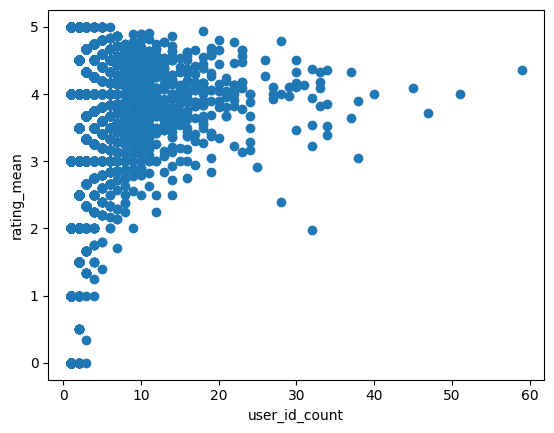

In [12]:
import matplotlib.pyplot as plt
plt.scatter(decider['user_id_count'], decider['rating_mean'])
plt.xlabel('user_id_count')
plt.ylabel('rating_mean')
plt.show()

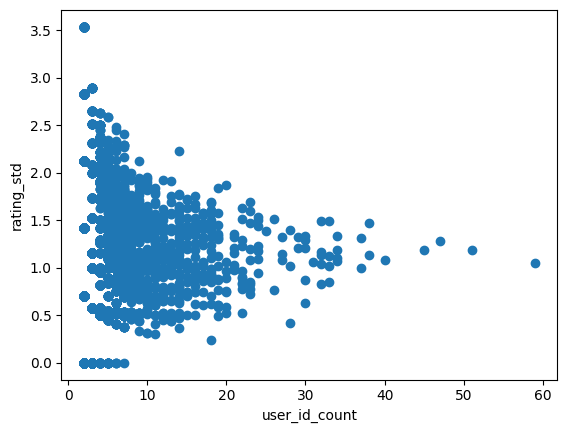

In [13]:
plt.scatter(decider['user_id_count'], decider['rating_std'])
plt.xlabel('user_id_count')
plt.ylabel('rating_std')
plt.show()

In [14]:
# identify problematic rows
mask = pd.to_datetime(data['date_added'], errors='coerce').isna()
problem_rows = data.loc[mask, 'date_added']
print(f"Rows with problematic data: {problem_rows}")
# drop problematic rows
data.drop(index=problem_rows.index, inplace=True)

# convert date_added to datetime format
datetime_format = '%a %b %d %H:%M:%S %z %Y'
data['date_added'] = pd.to_datetime(data['date_added'], format=datetime_format, utc=True)


Rows with problematic data: 36263    Tue 
Name: date_added, dtype: object


<Axes: title={'center': '10 Date with most reviews'}, xlabel='Dates', ylabel='Count'>

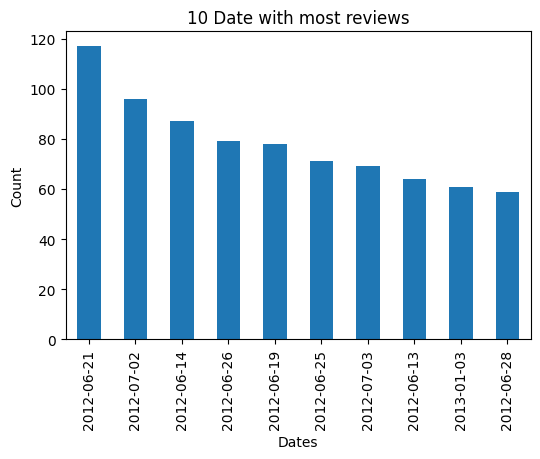

In [15]:
data_date = data['date_added'].dt.date
data_date.value_counts()[:10].plot(kind='bar', 
                                            figsize=(6, 4),
                                            title='10 Date with most reviews',
                                            xlabel='Dates',
                                            ylabel='Count')

<Axes: title={'center': 'Number of rating action in days of all weeks'}, xlabel='Day of week', ylabel='Count'>

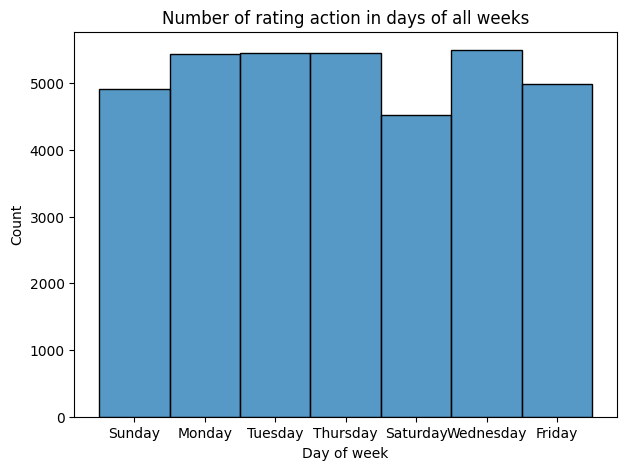

In [16]:

import seaborn as sns
plt.figure(figsize=(7, 5))
plt.title("Number of rating action in days of all weeks")
plt.xlabel("Day of week")
plt.ylabel("Count")
sns.histplot(data['date_added'].dt.day_name())

<Axes: title={'center': 'Number of rating action in months of all years'}, xlabel='Month of week', ylabel='Count'>

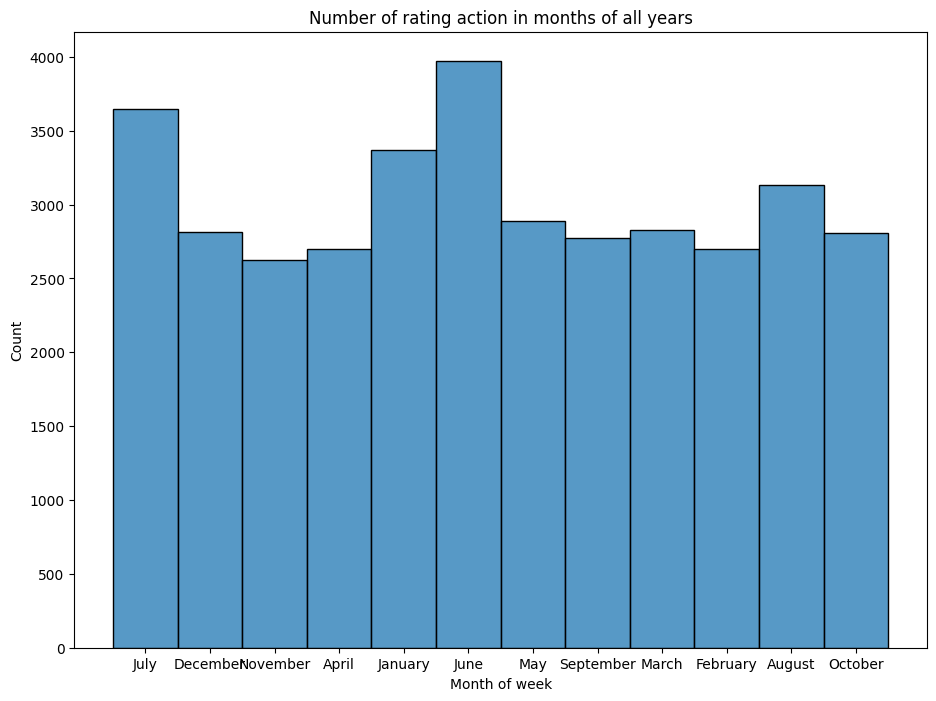

In [17]:
plt.figure(figsize=(11, 8))
plt.title("Number of rating action in months of all years")
plt.xlabel("Month of week")
plt.ylabel("Count")
sns.histplot(data['date_added'].dt.month_name())

In [18]:
# Dropping the columns of no use
data.drop(columns = ["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"], inplace = True)

In [19]:
# View the new train_df
data.sample(5, random_state = 42)

,rating,review_text
16092,3,"2.5-ish stars, leaning towards 3 because of th..."
25031,5,"What 'David Copperfield', always one of Dicken..."
18036,4,3.5? Good because It's Rainbow Rowell and I'm ...
428,5,This dark and fantastic story completely and u...
34542,5,It's an awesome ending to this trilogy. If I S...


In [20]:
data['rating'].value_counts()

4    12384
5    11608
3     7365
2     2580
0     1166
1     1160
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

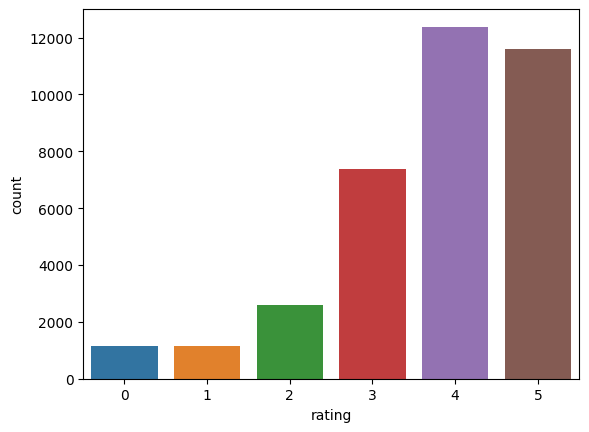

In [21]:
import seaborn as sns
sns.countplot(x = data.rating)

**Applying all the preprocessing steps like stop words removal, links and extra spaces**

In [22]:
# Lowercase the review text
data["review_text"] = data["review_text"].apply(lambda x: str(x).lower())

In [23]:
# Remove the line breaks and extra spaces
data["review_text"] = data["review_text"].apply(lambda x: " ".join(x.split()))

In [24]:
# re for matching and replacing patterns in string
import re

# Removing https links from the text
data["review_text"] = data["review_text"].apply(
    lambda x: re.sub(
        r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '',
        x, flags=re.MULTILINE))

data["review_text"] = data["review_text"].apply(
    lambda x: re.sub(
        r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '',
        x, flags=re.MULTILINE))

In [25]:
# Remove special charaters from the review text
data["review_text"] = data["review_text"].apply(lambda x: re.sub('\W+',' ', x))

In [26]:
# Import nltk and download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the stop words
stop_words = list(stopwords.words('english'))
# View the count of stop_words
len(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [27]:
# Remove stop_words from reviews
data["review_text"] = data["review_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [28]:
data.sample(5, random_state = 42)

,rating,review_text
16092,3,2 5 ish stars leaning towards 3 first half som...
25031,5,david copperfield always one dickens beloved f...
18036,4,3 5 good rainbow rowell convinced wrong defini...
428,5,dark fantastic story completely utterly thrill...
34542,5,awesome ending trilogy die much better ending ...


**As we discussed in project update meeting. I'm replacing 'read' and 'book' words as empty string.**

In [29]:
# Replace 'read' with an empty string in review_text column
data['review_text'] = data['review_text'].apply(lambda x: re.sub(r'\bread\b', '', x, flags=re.IGNORECASE))

# Replace 'book' with an empty string in review_text column
data['review_text'] = data['review_text'].apply(lambda x: re.sub(r'\bbook\b', '', x, flags=re.IGNORECASE))

**Visualizing Wordcloud on text data**

In [30]:
# Wordcloud for text visualization - most used words throughout all reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):

    wordcloud = WordCloud(
        colormap            = "Spectral",
        scale               = 3,
        random_state        = 1
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()

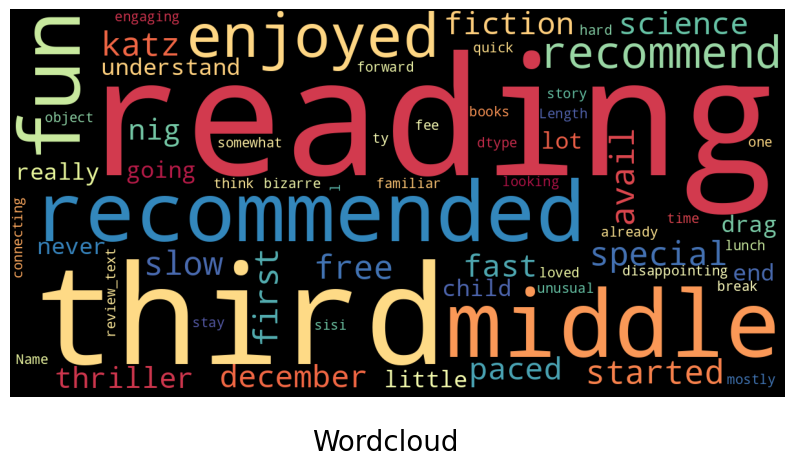

In [31]:
# Train data word cloud
show_wordcloud(data["review_text"], title = "Wordcloud")

In [32]:
# Import Plotly for plots
import plotly.express as px
import plotly.graph_objects as go
from IPython.core.display import HTML

In [33]:
# Importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n = None, ngram_range = (1, 1)):


    vec = CountVectorizer(stop_words = 'english', ngram_range = ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
# Function to plot the top n words by frequency
def get_frequency_count_plot(df, title, n = 20, ngram_range = (1, 1)):
    common_words = get_top_n_words(df['review_text'], n, ngram_range)
    temp_df = pd.DataFrame(common_words, columns = ['review_text' , 'count'])
    temp_df = temp_df.groupby('review_text').sum()['count'].sort_values(ascending = False)
    fig = go.Figure([
        go.Bar(x = temp_df.keys(), y = temp_df.values)
    ])
    fig.update_layout(
        title = title,
        xaxis_title = "Word",
        yaxis_title = "Count",
        width = 500,
        height = 300,
    )
    fig.update_xaxes(tickangle = 90)
    
    return fig

**Replace 'hide spoiler' and 'view spoiler' keywords with an empty string as we mentioned in project update meeting.**

In [35]:
import re
data['review_text'] = data['review_text'].apply(lambda x: re.sub(r'\bhide\s+spoiler\b', '', x, flags=re.IGNORECASE))
data['review_text'] = data['review_text'].apply(lambda x: re.sub(r'\bview\s+spoiler\b', '', x, flags=re.IGNORECASE))


In [36]:
# Top 20 words - unigrams from data
get_frequency_count_plot(df = data, title = "Top 20 words - unigrams", n = 20, ngram_range = (1, 1))

In [37]:
# Top 20 words - bigram from data
get_frequency_count_plot(df = data, title = "Top 20 words - bigram ", n = 20, ngram_range = (2, 2))

In [38]:
data

,rating,review_text
0,5,special started slow first third middle third...
1,3,recommended katz avail free december
2,3,fun fast paced science fiction thriller 2 nig...
3,0,recommended reading understand going middle am...
4,4,really enjoyed lot recommend drag little end ...
...,...,...
36258,4,never child disappointing think would loved ...
36259,2,already familiar sisi looking forward reading ...
36260,3,story mostly engaging hard time connecting fee...
36261,5,recommend reading lunch break one books stay l...


In [42]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
X = data['review_text']
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=404)
print(np.isnan(y_train).sum())
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors = tfidf_vectorizer.transform(X_test)

0


**Applying Naive Bayes Model**

In [47]:
NaiveBayes_model = MultinomialNB()
NaiveBayes_model.fit(X_train_vectors, y_train)

MultinomialNB()

In [48]:
#Predict y value for test dataset
y_predict_Naive = NaiveBayes_model.predict(X_test_vectors)
y_prob = NaiveBayes_model.predict_proba(X_test_vectors)[:,1]
print("Accuracy", str(np.mean(y_test == y_predict_Naive)))
print("-"*60)
print(classification_report(y_test,y_predict_Naive))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_test, y_predict_Naive))

Accuracy 0.4533296566937819
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       235
           1       0.00      0.00      0.00       225
           2       0.00      0.00      0.00       480
           3       0.60      0.03      0.06      1486
           4       0.38      0.82      0.52      2475
           5       0.64      0.51      0.57      2352

    accuracy                           0.45      7253
   macro avg       0.27      0.23      0.19      7253
weighted avg       0.46      0.45      0.38      7253

------------------------------------------------------------
Confusion Matrix: [[   0    0    0    2  170   63]
 [   0    0    0    7  200   18]
 [   0    0    0   18  434   28]
 [   0    0    0   47 1322  117]
 [   0    0    0    4 2030  441]
 [   0    0    0    0 1141 1211]]


**SVM Model**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_vectors, y_train)

In [ ]:
# predict y value for test dataset
y_predict_svm = svm_model.predict(X_test_vectors)
y_prob = svm_model.predict_proba(X_test_vectors)[:,1]
# evaluate the performance of the model
print("Accuracy:", str(np.mean(y_test == y_predict_svm)))
print("-"*60)
print(classification_report(y_test, y_predict_svm))
print("-"*60)
print('Confusion Matrix:', confusion_matrix(y_test, y_predict_svm))

**Applying Regression Models - Random Forest Model & Decision tree**

In [46]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectors, y_train)
y_predict_rf = rf_model.predict(X_test_vectors)
y_prob_rf = rf_model.predict_proba(X_test_vectors)[:,1]

print("Accuracy:", np.mean(y_test == y_predict_rf))
print("-"*60)
print(classification_report(y_test, y_predict_rf))
print("-"*60)
print('Confusion Matrix:', confusion_matrix(y_test, y_predict_rf))

Accuracy: 0.4763546118847374
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.17      0.27       235
           1       0.44      0.04      0.07       225
           2       0.40      0.01      0.02       480
           3       0.45      0.15      0.23      1486
           4       0.41      0.68      0.51      2475
           5       0.58      0.63      0.61      2352

    accuracy                           0.48      7253
   macro avg       0.48      0.28      0.28      7253
weighted avg       0.48      0.48      0.43      7253

------------------------------------------------------------
Confusion Matrix: [[  41    0    1   17   93   83]
 [   4    8    2   36  127   48]
 [   3    8    4  107  285   73]
 [   3    1    1  229 1060  192]
 [   5    0    2  102 1684  682]
 [  12    1    0   23  827 1489]]


**Decision Tree Model**

In [45]:

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vectors, y_train)
# Predict y value for test dataset
y_predict_dt = dt_model.predict(X_test_vectors)
print("Accuracy:", np.mean(y_test == y_predict_dt))
print("-"*60)
print(classification_report(y_test, y_predict_dt))
print("-"*60)
print('Confusion Matrix:', confusion_matrix(y_test, y_predict_dt))

Accuracy: 0.3761202261133324
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.30      0.22      0.25       235
           1       0.10      0.08      0.09       225
           2       0.14      0.11      0.12       480
           3       0.30      0.29      0.29      1486
           4       0.38      0.42      0.40      2475
           5       0.48      0.48      0.48      2352

    accuracy                           0.38      7253
   macro avg       0.28      0.27      0.27      7253
weighted avg       0.37      0.38      0.37      7253

------------------------------------------------------------
Confusion Matrix: [[  51   10   17   24   70   63]
 [   9   19   40   48   63   46]
 [   8   31   54  144  153   90]
 [  25   42  102  430  592  295]
 [  39   58  117  502 1037  722]
 [  38   34   66  287  790 1137]]


**Applying Logistic Regression Model**

In [43]:
logistic_model=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
logistic_model.fit(X_train_vectors, y_train)

LogisticRegression(C=10, solver='liblinear')

In [44]:
#Predict y value for test dataset
from sklearn.metrics import classification_report, confusion_matrix
y_predict_logistic = logistic_model.predict(X_test_vectors)
y_prob = logistic_model.predict_proba(X_test_vectors)[:,1]

print("Accuracy", str(np.mean(y_test == y_predict_logistic)))
print("-"*60)
print(classification_report(y_test,y_predict_logistic))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_test, y_predict_logistic))

Accuracy 0.48531642079139664
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.22      0.32       235
           1       0.39      0.16      0.23       225
           2       0.31      0.17      0.22       480
           3       0.40      0.38      0.39      1486
           4       0.45      0.52      0.48      2475
           5       0.59      0.64      0.61      2352

    accuracy                           0.49      7253
   macro avg       0.46      0.35      0.38      7253
weighted avg       0.48      0.49      0.47      7253

------------------------------------------------------------
Confusion Matrix: [[  52   13   14   23   69   64]
 [   5   36   51   64   40   29]
 [   5   21   80  201  119   54]
 [   8   12   73  562  653  178]
 [   6    7   32  401 1295  734]
 [  10    4   12  137  694 1495]]


**In conclusion, Based on the results of the models trained on the dataset, the logistic regression model performed the best with an accuracy of 0.485. The random forest model also performed relatively well with an accuracy of 0.476. However, the other models, including the decision tree, support vector machine, and naive Bayes models, performed poorly with accuracies ranging from 0.376 to 0.453. It is important to note that the performance of the models may be improved by adjusting the hyperparameters or by using more advanced techniques such as neural networks. Overall, the project highlights the importance of using natural language processing and machine learning techniques to analyze and classify reviews.**